## The Logistic Company (masked) - Feature Engineering

### About The Logistic Company (masked)

The Logistic Company is a fast-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

### Problem statement

The company wants to understand and process the data coming out of data engineering pipelines:
    
- Clean, sanitize and manipulate data to get useful features out of raw fields
- Make sense out of the raw data and help the data science team to build forecasting models on it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('The_Logistic_Company.csv')
pd.set_option('display.max_columns', None)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### Basic data exploration

In [3]:
# Structure of data(rows and columns)
df.shape

(144867, 24)

In [4]:
# Columns in data
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [5]:
# Characteristics of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [6]:
# Unique attributes for each column
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [7]:
# Statistical information for data
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [8]:
df.describe(include=['object'])

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [9]:
# Check for null values in data
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

### Observation

- There are 144867 rows and 24 columns in this data.
- Missing values found in the source name and destination columns.
- There are three categorical variables data, route_type, and is_cutoff.
- The continuous variables are having outliers init.

### Dropping null / missing values

In [10]:
# Dropping null values
df = df.dropna()

### Observation

- The percentage of missing values is very low or negligible, which will not impact our analysis so we can drop them.

### Co-relation and distribution of data

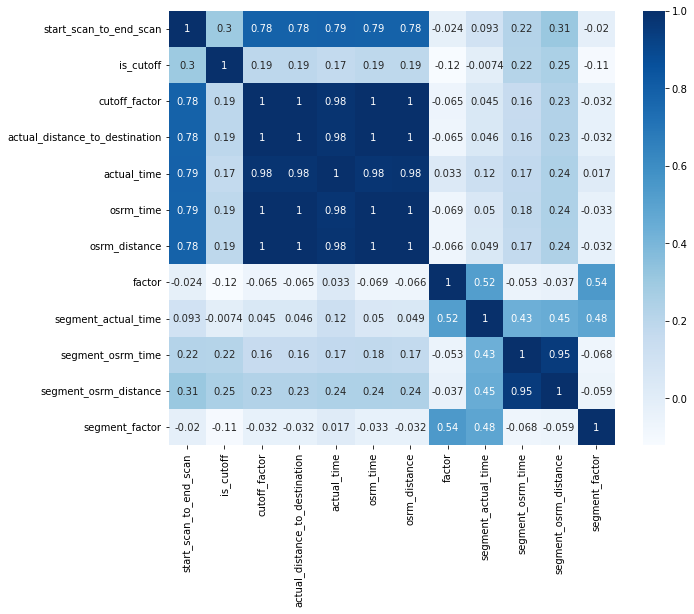

In [11]:
# Co-relation of data using heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap="Blues")
plt.show()

### Observation

- Strong positive linear relationship is seen between the variables which means that as one variable increases, the other variable also tends to increase.

### Outlier detection using Inter-Quartile Range(IQR) method

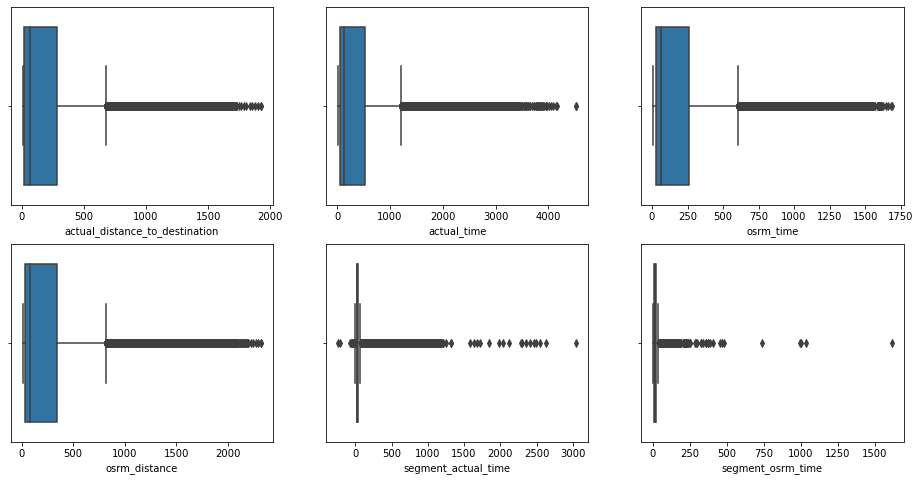

In [12]:
cols = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
fig, axis = plt.subplots(2,3,figsize=(16,8))
count = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[cols[count]], ax=axis[row,col])
        count+=1
plt.show()

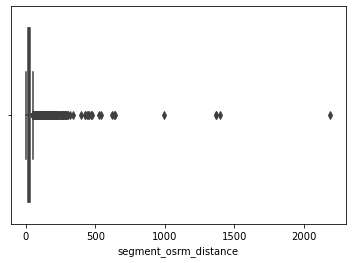

In [13]:
sns.boxplot(x=df['segment_osrm_distance'])
plt.show()

In [14]:
# Lower and Upper bounds for the columns
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(col,':') 
    print('Lower_bound:',round(lower_bound,2)) 
    print('Upper_bound:',round(upper_bound,2))

actual_distance_to_destination :
Lower_bound: -372.0
Upper_bound: 682.27
actual_time :
Lower_bound: -646.5
Upper_bound: 1213.5
osrm_time :
Lower_bound: -321.0
Upper_bound: 607.0
osrm_distance :
Lower_bound: -444.72
Upper_bound: 820.92
segment_actual_time :
Lower_bound: -10.0
Upper_bound: 70.0
segment_osrm_time :
Lower_bound: -5.5
Upper_bound: 38.5
segment_osrm_distance :
Lower_bound: -11.59
Upper_bound: 51.45


### Observation

- As per the Inter-Quartile range method, values greater than the upper limit are considered outliers.
- There are many outliers in each and every column.
- In this case outliers should not be removed because they often provide valuable information about the data, and removing them can result in biased or misleading results, and reduce the sample size and representativeness of the data.

### Univariate analysis

In [15]:
# Value counts for categorical variables
df['data'].value_counts()

training    104632
test         39684
Name: data, dtype: int64

In [16]:
df['route_type'].value_counts()

FTL        99132
Carting    45184
Name: route_type, dtype: int64

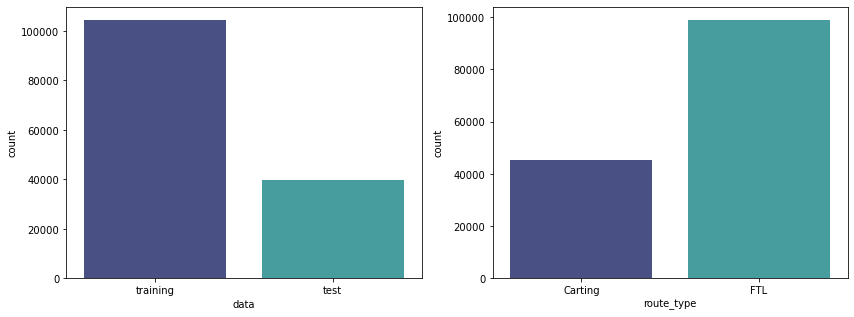

In [17]:
# Univariate analysis for categorical variables
fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.countplot(x=df['data'], palette = "mako", ax=axis[0])
sns.countplot(x=df['route_type'], palette = "mako", ax=axis[1])
plt.show()

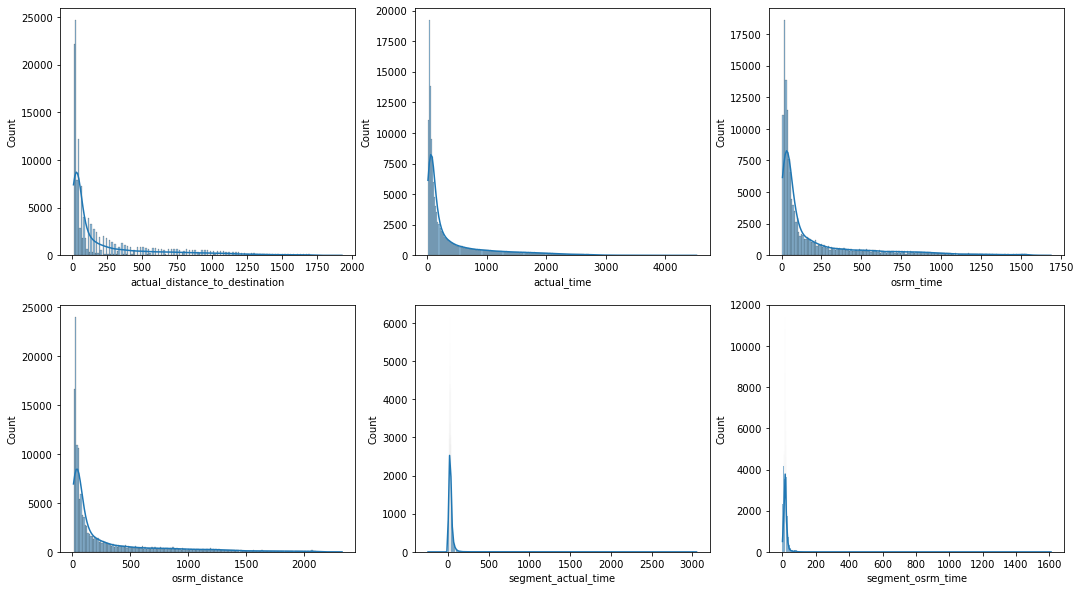

In [18]:
# Univariate analysis for each continuous variables
fig, axis = plt.subplots(2,3,figsize=(18, 10))
count = 0
for row in range(2):
    for col in range(3):
        sns.histplot(x=df[cols[count]], kde=True, ax=axis[row,col])
        count+=1
plt.show()

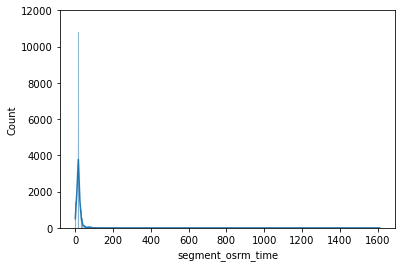

In [19]:
sns.histplot(x=df['segment_osrm_time'], kde=True)
plt.show()

### Observation

- The maximum number of data that comes from training is 104632 and then 39684 from testing.
- Maximum packages are delivered via FTL (Full Truck Load) shipments.
- Histogram plot shows the distribution of data seems to be right-skewed.

### Merging of rows and aggregation of fields

In [20]:
# Creating a dictionary for multiple grouping
group_dict = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time' : 'sum',
    'segment_osrm_time' : 'sum',
    'segment_osrm_distance' : 'sum',
}

In [21]:
# Data afetr performing groupby
df = df.groupby('trip_uuid').agg(group_dict).reset_index()
df.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,43659.0,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,906.0,240.208306,399.0,210.0,269.4308,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,248631.0,68163.502238,112225.0,65768.0,89447.2488,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,200.0,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,1586.0,239.007304,556.0,207.0,266.2914,340.0,115.0,146.7919


In [22]:
df.shape

(14787, 19)

### Observation

- As a result of grouping and merging rows for each trip_uuid, we have reduced the data to 14787 rows and 19 columns.
- A trip_uuid represents a single package delivery in a row containing the source and destination names.

### Handling categorical values with One-hot encoding method

In [23]:
# One-hot encoding method for data and route_type variable
data_one_hot = pd.get_dummies(df['data'], prefix='data')
df = pd.concat([df, data_one_hot], axis=1)

route_type_one_hot = pd.get_dummies(df['route_type'], prefix='route_type')
df = pd.concat([df, route_type_one_hot], axis=1)

# Dropping the original columns
df.drop(['data', 'route_type'], axis=1, inplace=True)

### Feature creation for analysis

In [24]:
# Feature creation for source name and destination name
df['source_city'] = df['source_name'].apply(lambda x: x.split("_")[0])
df['source_place'] = df['source_name'].apply(lambda x: x.split("_")[1] if len(x.split("_")) > 1 else None)
df['source_code'] = df['source_name'].apply(lambda x: x.split("_")[-1].split(" (")[0])
df['source_state'] = df['source_name'].apply(lambda x: x.split(" (")[-1].split(")")[0])

df['destination_city'] = df['destination_name'].apply(lambda x: x.split("_")[0])
df['destination_place'] = df['destination_name'].apply(lambda x: x.split("_")[1] if len(x.split("_")) > 1 else None)
df['destination_code'] = df['destination_name'].apply(lambda x: x.split("_")[-1].split(" (")[0])
df['destination_state'] = df['destination_name'].apply(lambda x: x.split(" (")[-1].split(")")[0])

# Dropping the original columns
df = df.drop(columns=['source_name', 'destination_name'])

In [25]:
# Feature creation for trip_creation_time
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['year'] = df['trip_creation_time'].dt.year
df['month'] = df['trip_creation_time'].dt.month
df['day'] = df['trip_creation_time'].dt.day
df['time'] = df['trip_creation_time'].dt.time

# Dropping the original columns
df = df.drop(columns=['trip_creation_time'])

In [26]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['difference_od_time'] = df['od_end_time'] - df['od_start_time']

# Dropping the original columns
df = df.drop(columns=['od_start_time', 'od_end_time'])

In [27]:
df.head()

,trip_uuid,route_schedule_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_test,data_training,route_type_Carting,route_type_FTL,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,year,month,day,time,difference_od_time
0,trip-153671041653548748,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,IND462022AAA,IND000000ACB,43659.0,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,1320.4733,0,1,0,1,Bhopal,Trnsport,H,Madhya Pradesh,Gurgaon,Bilaspur,HB,Haryana,2018,9,12,00:00:16.535741,1 days 13:40:06.588003
1,trip-153671042288605164,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,IND572101AAA,IND562101AAA,906.0,240.208306,399.0,210.0,269.4308,141.0,65.0,84.1894,0,1,1,0,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,2018,9,12,00:00:22.886430,0 days 03:01:36.712425
2,trip-153671043369099517,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,IND562132AAA,IND160002AAC,248631.0,68163.502238,112225.0,65768.0,89447.2488,3308.0,1941.0,2545.2678,0,1,0,1,Bangalore,Nelmngla,H,Karnataka,Chandigarh,Mehmdpur,H,Punjab,2018,9,12,00:00:33.691250,2 days 17:34:21.751204
3,trip-153671046011330457,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,IND400072AAB,IND401104AAA,200.0,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766,0,1,1,0,Mumbai Hub (Maharashtra),None,Mumbai Hub,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,2018,9,12,00:01:00.113710,0 days 01:40:29.696112
4,trip-153671052974046625,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,IND583101AAA,IND583101AAA,1586.0,239.007304,556.0,207.0,266.2914,340.0,115.0,146.7919,0,1,0,1,Bellary,Dc (Karnataka),Dc,Karnataka,Bellary,Dc (Karnataka),Dc,Karnataka,2018,9,12,00:02:09.740725,0 days 11:58:20.942506


### Observation

- Dropping source and destination names we have extracted city, place, code, and state from it.
- Dropping the trip_creation_time column once we have extracted it into the year, month, day, and time columns.
- Extracted new feature, difference_od_time from the od_start_time and od_end_time columns.

### Analysis after feature creation

In [28]:
# Average time for trip start and end
df['difference_od_time'].mean()

Timedelta('0 days 09:06:08.293688780')

In [29]:
# Top 5 states with hishest count for source center
df['source_state'].value_counts()[:5]

Maharashtra    2682
Karnataka      2229
Haryana        1669
Tamil Nadu     1085
Delhi           790
Name: source_state, dtype: int64

In [30]:
# Top 5 states with hishest count for source center
df['destination_state'].value_counts()[:5]

Maharashtra    2591
Karnataka      2276
Haryana        1664
Tamil Nadu     1072
Telangana       843
Name: destination_state, dtype: int64

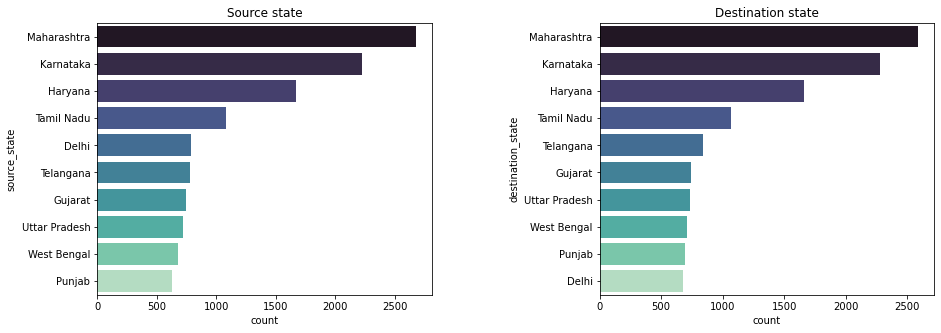

In [31]:
# Top 10 state with maximum count for source and destination
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

sns.countplot(y=df['source_state'], order=df['source_state'].value_counts().index[:10], palette='mako', ax=ax[0])
ax[0].set_title('Source state')

sns.countplot(y=df['destination_state'], order=df['destination_state'].value_counts().index[:10], palette='mako', ax=ax[1])
ax[1].set_title('Destination state')

plt.show()

In [32]:
df['source_city'].value_counts()[:5]

Bengaluru    1015
Gurgaon      1013
Bhiwandi      811
Bangalore     755
Delhi         617
Name: source_city, dtype: int64

In [33]:
df['destination_city'].value_counts()[:5]

Bengaluru    1056
Mumbai        891
Gurgaon       869
Bangalore     646
Hyderabad     630
Name: destination_city, dtype: int64

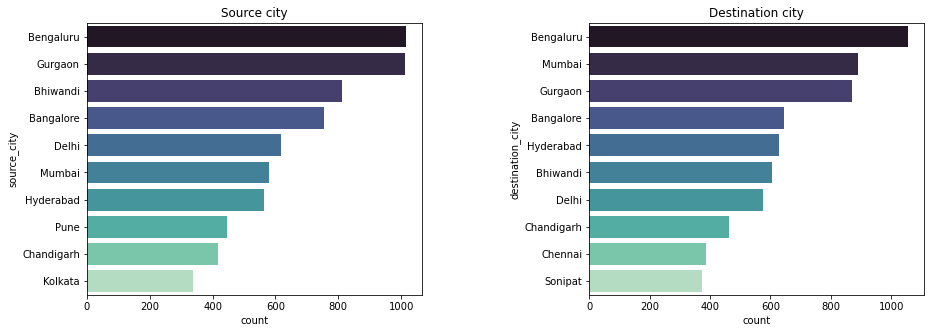

In [34]:
# Top 10 cities with maximum count for source and destination
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

sns.countplot(y=df['source_city'], order=df['source_city'].value_counts().index[:10], palette='mako', ax=ax[0])
ax[0].set_title('Source city')

sns.countplot(y=df['destination_city'], order=df['destination_city'].value_counts().index[:10], palette='mako', ax=ax[1])
ax[1].set_title('Destination city')

plt.show()

### Observation

- Average time for trip start and end is 0 days, 9 hours, 6 minutes, 8 seconds.
- The maximum number of deliveries from source and destination states happens in Maharashtra, followed by Karnataka and Haryana.
- The maximum number of deliveries from source and destination cities happens to be from Bengaluru, Gurgaon, and Mumbai.

### Comparison & Visualization of time and distance fields (Bivariate analysis)

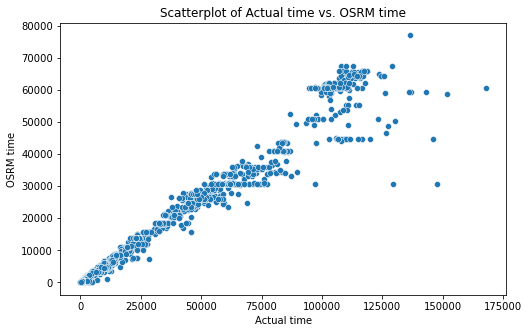

In [35]:
# visual analysis for difference between actual time and osrm time
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=df['actual_time'], y=df['osrm_time'])
plt.xlabel('Actual time')
plt.ylabel('OSRM time')
plt.title('Scatterplot of Actual time vs. OSRM time')
plt.show()

### Two sample t-test to check the difference between actual time and osrm time

- Define null hypothesis
- Null hypothesis H0: There is no difference between the actual time and the OSRM estimated time.
- Alternate hypothesis Ha: There is a difference between the actual time and the OSRM estimated time.
- Significance level (alpha): 0.05

In [36]:
# Importing stats library
from scipy.stats import ttest_ind
# perform a two-sample t-test
t_stat, p_val = ttest_ind(df['actual_time'], df['osrm_time'])
t_stat, p_val

(14.054765721968753, 1.0035150782316351e-44)

In [37]:
# Conclusion from p-value
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


### Observation

- From the above test results we can conclude that there is a difference between the actual time and the OSRM estimated time.

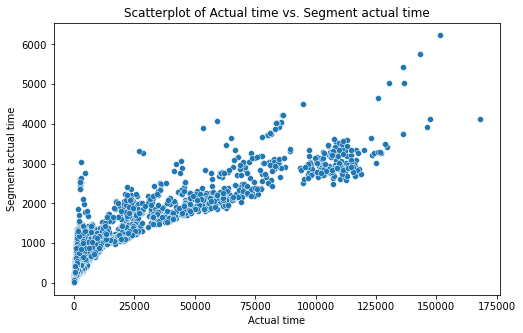

In [38]:
# visual analysis for difference between actual time and segment actual time
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=df['actual_time'], y=df['segment_actual_time'])
plt.xlabel('Actual time')
plt.ylabel('Segment actual time')
plt.title('Scatterplot of Actual time vs. Segment actual time')
plt.show()

### Two sample t-test to check the difference between actual time and segment actual time

- Define null hypothesis
- Null hypothesis H0: There is no difference between the actual time and the segment actual time.
- Alternate hypothesis Ha: There is a difference between the actual time and the segment actual time.
- Significance level (alpha): 0.05

In [39]:
# Importing stats library
from scipy.stats import ttest_ind
# perform a two-sample t-test
t_stat, p_val = ttest_ind(df['actual_time'], df['segment_actual_time'])
t_stat, p_val

(29.729631525728006, 2.094590710444802e-191)

In [40]:
# Conclusion from p-value
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


### Observation

- From the above test results we can conclude that there is a difference between the actual time and the segment actual time.

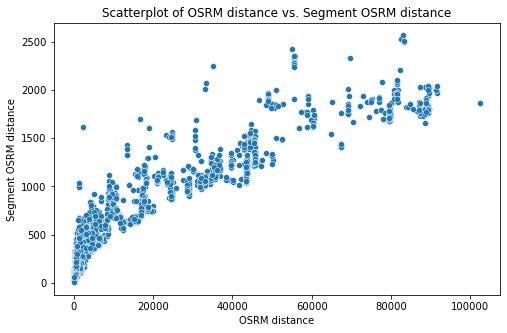

In [41]:
# visual analysis for difference between osrm distance and segment osrm distance
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=df['osrm_distance'], y=df['segment_osrm_time'])
plt.xlabel('OSRM distance')
plt.ylabel('Segment OSRM distance')
plt.title('Scatterplot of OSRM distance vs. Segment OSRM distance')
plt.show()

### Two sample t-test to check the difference between osrm distance and segment osrm distance

- Define null hypothesis
- Null hypothesis H0: There is no difference between the OSRM distance and the segment OSRM distance.
- Alternative hypothesis Ha: There is a difference between the OSRM distance and the segment OSRM distance.
- Significance level (alpha): 0.05

In [42]:
# Importing stats library
from scipy.stats import ttest_ind
# perform a two-sample t-test
t_stat, p_val = ttest_ind(df['osrm_distance'], df['segment_osrm_distance'])
t_stat, p_val

(28.93044380372159, 1.6776818679213108e-181)

In [43]:
# Conclusion from p-value
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


### Observation

- From the above test results we can conclude that there is a difference between the OSRM distance and the segment OSRM distance.

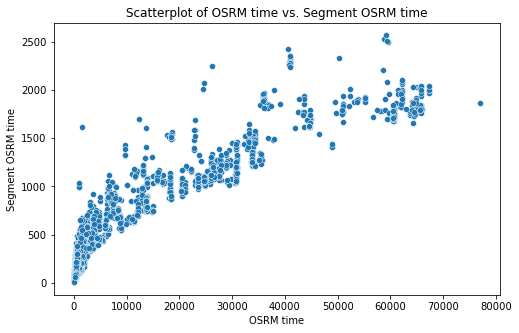

In [44]:
# visual analysis for difference between osrm time and segment osrm time
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=df['osrm_time'], y=df['segment_osrm_time'])
plt.xlabel('OSRM time')
plt.ylabel('Segment OSRM time')
plt.title('Scatterplot of OSRM time vs. Segment OSRM time')
plt.show()

### Two sample t-test to check the difference between osrm time and segment osrm time

- Define null hypothesis
- Null hypothesis H0: There is no difference between the OSRM time and the segment OSRM time.
- Alternative hypothesis Ha: There is a difference between the OSRM time and the segment OSRM time.
- Significance level (alpha): 0.05

In [45]:
# Importing stats library
from scipy.stats import ttest_ind
# perform a two-sample t-test
t_stat, p_val = ttest_ind(df['osrm_time'], df['segment_osrm_time'])
t_stat, p_val

(29.17350787831633, 1.735881315681226e-184)

In [46]:
# Conclusion from p-value
if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


### Observation

- From the above test results we can conclude that there is a difference between the OSRM time and the segment OSRM time.

### Normalizing the numerical features using MinMaxScaler or StandardScaler.

In [47]:
# Normalize the numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

columns = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

In [48]:
df.head()

,trip_uuid,route_schedule_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,data_test,data_training,route_type_Carting,route_type_FTL,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state,year,month,day,time,difference_od_time
0,trip-153671041653548748,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,IND462022AAA,IND000000ACB,43659.0,0.104014,0.093341,0.101122,0.103203,0.247388,0.391712,0.373134,0,1,0,1,Bhopal,Trnsport,H,Madhya Pradesh,Gurgaon,Bilaspur,HB,Haryana,2018,9,12,00:00:16.535741,1 days 13:40:06.588003
1,trip-153671042288605164,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,IND572101AAA,IND562101AAA,906.0,0.002717,0.002323,0.002651,0.002542,0.021218,0.023065,0.021373,0,1,1,0,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,2018,9,12,00:00:22.886430,0 days 03:01:36.712425
2,trip-153671043369099517,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,IND562132AAA,IND160002AAC,248631.0,0.800858,0.668306,0.854640,0.873362,0.530301,0.756450,0.721625,0,1,0,1,Bangalore,Nelmngla,H,Karnataka,Chandigarh,Mehmdpur,H,Punjab,2018,9,12,00:00:33.691250,2 days 17:34:21.751204
3,trip-153671046011330457,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,IND400072AAB,IND401104AAA,200.0,0.000229,0.000435,0.000234,0.000220,0.008037,0.003909,0.003074,0,1,1,0,Mumbai Hub (Maharashtra),None,Mumbai Hub,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,2018,9,12,00:01:00.113710,0 days 01:40:29.696112
4,trip-153671052974046625,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,IND583101AAA,IND583101AAA,1586.0,0.002703,0.003258,0.002612,0.002512,0.053207,0.042611,0.039185,0,1,0,1,Bellary,Dc (Karnataka),Dc,Karnataka,Bellary,Dc (Karnataka),Dc,Karnataka,2018,9,12,00:02:09.740725,0 days 11:58:20.942506


### Observation

- After normalizing we can compare this features against the performance of the model using the original features to determine which approach provides better results.

### Business Insights

- The data in this dataset is not evenly distributed, with most of the observations being concentrated in one region.
- There is a strong connection between the variables in the dataset, meaning that an increase in one variable is likely to result in an increase in another variable.
- The majority of shipments are delivered via Full Truck Load (FTL).
- The highest number of deliveries from source and destination states happen in Maharashtra, followed by Karnataka and Haryana.
- Bengaluru, Gurgaon, and Mumbai have the highest number of deliveries from source and destination cities.
- The average time for a delivery in this dataset is approximately 9 hours 6 minutes.
- The actual time it takes to complete a delivery is not the same as the estimated time based on the OSRM algorithm.
- The actual delivery time is also different from the estimated delivery time based on the segment actual time.
- The actual delivery distance is different from both the estimated delivery distance based on the OSRM algorithm and the estimated delivery distance based on the segment OSRM distance.

### Recommendations

- Evaluate the reasons for the difference between the actual delivery time and the estimated delivery time using the OSRM algorithm, and consider ways to improve the accuracy of the algorithm.
- Evaluate the possibility of expanding the service to new regions to increase the customer base.
- Consider offering new services such as same-day delivery or express delivery to differentiate from competitors and attract customers.
- Gather customer feedback and use it to improve the delivery service and meet customer needs.
- Marketing and branding can help to increase awareness of the delivery service and attract new customers.